## Assignment week 05: Sleeping habits

Welcome to **week five** of this course programming 1. You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. Learning outcomes:


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [1]:
import pandas as pd
from pathlib import Path
import yaml
# The datafile columns consist of multiple types. Therefore, I read all types in as a string, remove everything that
# needs to be removed and than change the types back to what they should be.
def get_config():
    with open("config.yaml","r") as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()
data_dir = config["datadir"]

data = pd.read_csv(Path(data_dir + "sleep.csv"))

In [2]:
#code printing percentage missing data
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Percentage of missing data': percent_missing.round(2)})
print(missing_value_df)

            Percentage of missing data
Enough                            0.00
Hours                             1.92
PhoneReach                        0.00
PhoneTime                         0.00
Tired                             0.00
Breakfast                         0.00


In [3]:
data

Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0      Yes    8.0        Yes       Yes      3       Yes
1       No    6.0        Yes       Yes      3        No
2      Yes    6.0        Yes       Yes      2       Yes
3       No    7.0        Yes       Yes      4        No
4       No    7.0        Yes       Yes      2       Yes
..     ...    ...        ...       ...    ...       ...
99      No    7.0        Yes       Yes      2       Yes
100     No    7.0         No       Yes      3       Yes
101    Yes    8.0        Yes       Yes      3       Yes
102    Yes    7.0        Yes       Yes      2       Yes
103    Yes    6.0        Yes       Yes      3       Yes

[104 rows x 6 columns]

In [4]:
#code printing answer dependent and independent variables
print("Dependent Variables on the first research question: The dependent variable would: be hours of sleep")
print("The independet variable would be: Breaksfast")
print("\n")
print("Dependent Variables on the second research question: The dependent variable would: be hours of sleep")
print("The independet variable would be: Breaksfast and tiredness score")


Dependent Variables on the first research question: The dependent variable would: be hours of sleep
The independet variable would be: Breaksfast


Dependent Variables on the second research question: The dependent variable would: be hours of sleep
The independet variable would be: Breaksfast and tiredness score


In [36]:
#code printing answer about datatypes
# print(data)
import numpy as np
print(data.dtypes)
print(data.Breakfast.unique())
print(data)
print("The datatypes do not seem to be correct. The breakfast column only contains Yes and No values")
print("Therefore it should be of the boolean datatype and not the object dataype.")
print("The same is true for PhoneReach, if someone had enough sleep and PhoneTime")

#Changes the datatype of breakfast to boolean
# if type(data.Breakfast) != bool:
#     data.Breakfast = np.where(data.Breakfast == "Yes", True, False)

Enough          int64
Hours         float64
PhoneReach      int64
PhoneTime       int64
Tired           int64
Breakfast       int64
tireness       object
dtype: object
[1 0]
     Enough  Hours  PhoneReach  PhoneTime  Tired  Breakfast tireness
0         1    8.0           1          1      3          1    Maybe
1         0    6.0           1          1      3          0    Maybe
2         1    6.0           1          1      2          1       No
3         0    7.0           1          1      4          0      Yes
4         0    7.0           1          1      2          1       No
..      ...    ...         ...        ...    ...        ...      ...
99        0    7.0           1          1      2          1       No
100       0    7.0           0          1      3          1    Maybe
101       1    8.0           1          1      3          1    Maybe
102       1    7.0           1          1      2          1       No
103       1    6.0           1          1      3          1    Mayb

In [6]:
print(data)

    Enough  Hours PhoneReach PhoneTime  Tired Breakfast
0      Yes    8.0        Yes       Yes      3       Yes
1       No    6.0        Yes       Yes      3        No
2      Yes    6.0        Yes       Yes      2       Yes
3       No    7.0        Yes       Yes      4        No
4       No    7.0        Yes       Yes      2       Yes
..     ...    ...        ...       ...    ...       ...
99      No    7.0        Yes       Yes      2       Yes
100     No    7.0         No       Yes      3       Yes
101    Yes    8.0        Yes       Yes      3       Yes
102    Yes    7.0        Yes       Yes      2       Yes
103    Yes    6.0        Yes       Yes      3       Yes

[104 rows x 6 columns]


---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [7]:
#code your answer to the value counts and distribution plots here
import matplotlib.pyplot as plt
hours_count = data.Hours.value_counts().rename_axis('Hours_of_sleep').reset_index(name='counts')
phonereach_count = data.PhoneReach.value_counts().rename_axis('Phone_Reach').reset_index(name='counts')
phonetime_count = data.PhoneTime.value_counts().rename_axis('Phone_Time').reset_index(name='counts')
tired_count = data.Tired.value_counts().rename_axis('Score').reset_index(name='counts')
breakfast_count = data.Breakfast.value_counts().rename_axis('Had_Breakfast').reset_index(name='counts')

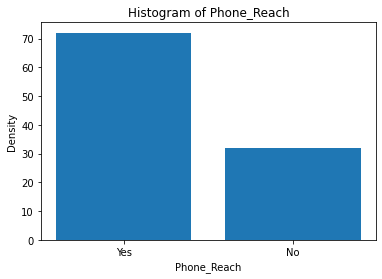

In [8]:
def make_distribution_plot(data):
    plt.bar(data.iloc[:,0], data.iloc[:,1])
    plt.xlabel(data.columns[0])
    plt.ylabel("Density")
    plt.title(f"Histogram of {data.columns[0]}")
    
make_distribution_plot(phonereach_count)

Text(0.5, 1.0, 'Histogram of Hours_of_sleep')

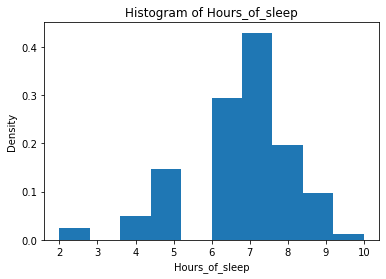

In [9]:
a = np.repeat(hours_count.iloc[:,0], hours_count.iloc[:,1])
plt.hist(a, density=True)
plt.ylabel("Density")
plt.xlabel(hours_count.columns[0])
plt.title(f"Histogram of {hours_count.columns[0]}")

In [10]:
#code for the scatter plot here
from bokeh.layouts import column
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg
from bokeh.transform import jitter, factor_cmap
from bokeh.io import output_notebook
from bokeh.models import Title
output_notebook()

index_cmap = factor_cmap('Breakfast', palette=['red', 'blue'], 
                         factors=sorted(data.Breakfast.unique()))

p = figure(width=600, height=300, title="Sleepscore vs Tiredness", x_axis_label="Tiredness Score", y_axis_label="Hours of sleep")
p.scatter(x=jitter('Tired', 0.6), y=jitter('Hours', 0.4), legend_field="Breakfast", source=data, size=9, alpha=0.2,fill_color=index_cmap)
p.add_layout(Title(text="Scatterplot of the tiredness score and hours of sleep.", 
                   align="center", text_font_size = '8pt'), "below")
p.add_layout(Title(text="The datapoints are coloured depending on the answer of the participants if they had breakfast or not", 
                   align="center", text_font_size = '8pt'), "below")

show(p)

Loading BokehJS ...

In [11]:
#code your answer to the target statistics here
print(data.mean())
print(data.std())

Hours    6.656863
Tired    3.076923
dtype: float64
Hours    1.417676
Tired    1.011510
dtype: float64


/tmp/ipykernel_2971185/2756453813.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())
/tmp/ipykernel_2971185/2756453813.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.std())


In [12]:
#code your answer for the heatmap here and briefly state your finding
#plot a heatmap
# Correlations between categorial data can be done by using the chi2 test, but that is not required in this assignment
# from scipy.stats import chisquare

data.Enough = np.where(data.Enough == "Yes", 1, 0)
data.PhoneReach = np.where(data.PhoneReach == "Yes", 1, 0)
data.PhoneTime = np.where(data.PhoneTime == "Yes", 1, 0)
data.Breakfast = np.where(data.Breakfast == "Yes", 1, 0)
print(data)

     Enough  Hours  PhoneReach  PhoneTime  Tired  Breakfast
0         1    8.0           1          1      3          1
1         0    6.0           1          1      3          0
2         1    6.0           1          1      2          1
3         0    7.0           1          1      4          0
4         0    7.0           1          1      2          1
..      ...    ...         ...        ...    ...        ...
99        0    7.0           1          1      2          1
100       0    7.0           0          1      3          1
101       1    8.0           1          1      3          1
102       1    7.0           1          1      2          1
103       1    6.0           1          1      3          1

[104 rows x 6 columns]


In [13]:
print(data.mean())
print(data.std())
df = data.corr()
print(df)

dfc = pd.DataFrame(df.stack(), columns=['r']).reset_index()
dfc

y_range = (list(reversed(df.columns)))
x_range = (list(df.index))

Enough        0.346154
Hours         6.656863
PhoneReach    0.692308
PhoneTime     0.807692
Tired         3.076923
Breakfast     0.605769
dtype: float64
Enough        0.478047
Hours         1.417676
PhoneReach    0.463774
PhoneTime     0.396022
Tired         1.011510
Breakfast     0.491051
dtype: float64
              Enough     Hours  PhoneReach  PhoneTime     Tired  Breakfast
Enough      1.000000  0.380740   -0.084214  -0.003945 -0.417006   0.132029
Hours       0.380740  1.000000   -0.054957   0.151378 -0.191913   0.225818
PhoneReach -0.084214 -0.054957    1.000000   0.150451 -0.073232  -0.239392
PhoneTime  -0.003945  0.151378    0.150451   1.000000 -0.035423   0.005761
Tired      -0.417006 -0.191913   -0.073232  -0.035423  1.000000  -0.251096
Breakfast   0.132029  0.225818   -0.239392   0.005761 -0.251096   1.000000


In [14]:
from bokeh.models import ColumnDataSource
source = ColumnDataSource(dfc)

#plot a heatmap
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter,)
from bokeh.transform import transform
from bokeh.palettes import Viridis256

#create colormapper 
mapper = LinearColorMapper(palette=Viridis256, low=dfc.r.min(), high=dfc.r.max())

#create plot
p = figure(title="correlation heatmap", plot_width=500, plot_height=450,
           x_range=x_range, y_range=y_range, x_axis_location="above", toolbar_location=None)

#use mapper to fill the rectangles in the plot
p.rect(x="level_0", y="level_1", width=1, height=1, source=source,
       line_color=None, fill_color=transform('r', mapper))

# create and add colorbar to the right
color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(x_range)), 
                     formatter=PrintfTickFormatter(format="%.1f"))
p.add_layout(color_bar, 'right')

#draw axis
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

#show
show(p)

---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [15]:
# your code to plot here

# plt.hist(a, density=True)
# plt.ylabel("Density")
# plt.xlabel(hours_count.columns[0])
# plt.title(f"Histogram of {hours_count.columns[0]}")

import numpy as np
from scipy.stats import norm, iqr
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.io import output_notebook
from bokeh.models import Span, Label
output_notebook()

v = np.mean(np.repeat(hours_count.Hours_of_sleep, hours_count.counts))
hist, edges = np.histogram(data[data.Hours.notnull()].Hours, density=True, bins=10)
p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white", legend_label="Hours slept")
vline = Span(location=v, dimension='height', line_color='red', line_width=3)

#Normal
y = (np.repeat(hours_count.Hours_of_sleep, hours_count.counts))
u_ML = np.mean(y)
sigma2 = np.mean((y-u_ML)**2)
sigma = np.sqrt(sigma2)
n = len(np.repeat(hours_count.Hours_of_sleep, hours_count.counts))
s2 = (n/(n-1))*sigma2
s = np.sqrt(s2)
x = np.linspace(0,11,201)
f_plot = np.array([norm.pdf(xi, u_ML, s) for xi in x])

#Robust
mu_R = np.median(y)
sigma_R = iqr(y)/1.349
f_N_R = np.array([norm.pdf(xi, loc = mu_R, scale = sigma_R) for xi in x])


vline = Span(location=v, dimension='height', line_color='red', line_width=3)
vline2 = Span(location=mu_R, dimension='height', line_color='green', line_width=3)
p.renderers.extend([vline, vline2])
p.line(x, f_plot, legend_label="Normal distribution", line_width=2, color="red")
p.line(x, f_N_R, legend_label="Robust distribution", line_width=2, color="green")

show(p)

Loading BokehJS ...

In [16]:
# briefly summarize your findings
#The data seems to be approximately distributed, though this may not entirely be the case. Both the mean and median are 
#what is expected from the normal and robust distribution, but the variance seems different in both cases. In order to check if the
#data is normally distributed it would be wise to use a QQ_plot instead.

Estimation method: robust
mu =  7.0 , sigma =  0.7412898443291327


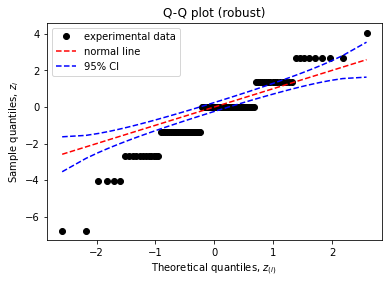

()

In [17]:
def Q_Q_Plot(y, est = 'robust', **kwargs):
    
    ################################################################################
    #
    # Arguments:
    #
    # y                  data array
    # est                Estimation method for normal parameters mu and sigma:
    #                    either 'robust' (default), or 'ML' (Maximum Likelihood),
    #                    or 'preset' (given values)
    # If est='preset' than the optional parameters mu, sigma must be provided
    #
    # Author:            M.E.F. Apol
    # Date:              2020-01-06
    #
    ################################################################################
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.mean((y - mu_ML)**2)
    sigma_ML = np.sqrt(sigma2_ML) # biased estimate
    s2 = n/(n-1) * sigma2_ML
    s = np.sqrt(s2) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
        
    print('Estimation method: ' + est)
    print('mu = ',mu,', sigma = ',sigma)
        
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu)/sigma

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    from scipy.stats import norm
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper = z_th + 1.96 * SE_z_th
    CI_lower = z_th - 1.96 * SE_z_th

    # Make Q-Q plot:
    plt.plot(z_th, z_i, 'o', color='k', label='experimental data')
    plt.plot(z_th, z_th, '--', color='r', label='normal line')
    plt.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    plt.plot(z_th, CI_lower, '--', color='b')
    plt.xlabel('Theoretical quantiles, $z_{(i)}$')
    plt.ylabel('Sample quantiles, $z_i$')
    plt.title('Q-Q plot (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    return();

Q_Q_Plot(y)

Using the QQ_plot function, developed by Emile Apol, reveals that the data is not normally distributed as the majority of the
data points lie outisde of the red normal line.

In [18]:
from scipy import stats
shapiro_test = stats.shapiro(data[data.Hours.notnull()].Hours)
print(f"The p-value of the test is {shapiro_test[1]}")
print("The p-value is smaller than the alpha of 0.05, thus the null hypothesis is rejected")
print("The values are not normally distrributed")

The p-value of the test is 7.15833084541373e-05
The p-value is smaller than the alpha of 0.05, thus the null hypothesis is rejected
The values are not normally distrributed


<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [19]:
# your code to plot here
import hvplot.pandas
from bokeh.models.widgets import Tabs, Panel
boxplot1 = data.hvplot.box(y='Hours', by="Tired", color="Tired")
boxplot2 = data.hvplot.box(y='Hours', by="Breakfast", color="Breakfast")
boxplot3 = data.hvplot.box(y='Hours', by=["Breakfast", "Tired"], color="Tired")

In [20]:
boxplot1

:BoxWhisker   [Tired]   (Hours)

In [21]:
boxplot2

:BoxWhisker   [Breakfast]   (Hours)

In [22]:
boxplot3

:BoxWhisker   [Breakfast,Tired]   (Hours)

In [23]:
# your code for the statistical test here
from scipy import stats
levene_test1 = stats.levene(data[(data.Hours.notnull()) & (data.Tired == 2)].Hours, 
                           data[(data.Hours.notnull()) & (data.Tired == 3)].Hours)

levene_test2 = stats.levene(data[(data.Hours.notnull()) & (data.Tired == 2)].Hours, 
                           data[(data.Hours.notnull()) & (data.Tired == 4)].Hours)

levene_test3 = stats.levene(data[(data.Hours.notnull()) & (data.Tired == 3)].Hours, 
                           data[(data.Hours.notnull()) & (data.Tired == 4)].Hours)

print(levene_test1)
print(levene_test2)
print(levene_test3)



LeveneResult(statistic=1.3461379106244464, pvalue=0.2503323975791843)
LeveneResult(statistic=0.34396008904493397, pvalue=0.5603586750602487)
LeveneResult(statistic=0.14690225714821784, pvalue=0.7028680933668154)


In [24]:
# briefly summarize your findings
print("Based on the boxplots most variances of the hours of sleep differ among different tired scores, having had breakfast or both")
print("When taking only the tiredness scores into account, the variances of tiredness score 2,3 and 4 seems to be simmilar")
print("Using the Levene’s & Bartlett’s Test of Equality on these tiredness scores, the p-value is always above 0.5")
print("This means that the null hypothesis cannot be rejected and that the variances are equal")

Based on the boxplots most variances of the hours of sleep differ among different tired scores, having had breakfast or both
When taking only the tiredness scores into account, the variances of tiredness score 2,3 and 4 seems to be simmilar
Using the Levene’s & Bartlett’s Test of Equality on these tiredness scores, the p-value is always above 0.5
This means that the null hypothesis cannot be rejected and that the variances are equal


---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [34]:
#your solution here
# Combinining multiple np.where allows do easily do this
data["tireness"] = np.where(data.Tired == 1, 'No', np.where(data.Tired == 2, "No", 
                   np.where(data.Tired == 3, "Maybe", np.where(data.Tired == 4, "Yes",
                   "Yes"))))

print(len(data[data.tireness == "No"]))
print(len(data[data.tireness == "Maybe"]))
print(len(data[data.tireness == "Yes"]))

31
40
33


---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [67]:
print(data[data.Hours.notnull()])
print(had_breakfast)

     Enough  Hours  PhoneReach  PhoneTime  Tired  Breakfast tireness
0         1    8.0           1          1      3          1    Maybe
1         0    6.0           1          1      3          0    Maybe
2         1    6.0           1          1      2          1       No
3         0    7.0           1          1      4          0      Yes
4         0    7.0           1          1      2          1       No
..      ...    ...         ...        ...    ...        ...      ...
99        0    7.0           1          1      2          1       No
100       0    7.0           0          1      3          1    Maybe
101       1    8.0           1          1      3          1    Maybe
102       1    7.0           1          1      2          1       No
103       1    6.0           1          1      3          1    Maybe

[102 rows x 7 columns]
     Enough  Hours  PhoneReach  PhoneTime  Tired  Breakfast tireness
0         1    8.0           1          1      3          1    Maybe
2         

In [73]:
#Your solution here
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Change for breakfast yes and no
data = data[data.Hours.notnull()]
had_breakfast = data[data.Breakfast == 1]
no_breakfast = data[data.Breakfast == 0]
F, p = stats.f_oneway(had_breakfast.Hours, no_breakfast.Hours)
print(F, p)

model = ols('Hours ~ C(Breakfast) + C(Tired) + C(Breakfast):C(Tired)', data=data).fit()
print(sm.stats.anova_lm(model, typ=2))

5.373395129030667 0.02248305568548428
                           sum_sq    df         F    PR(>F)
C(Breakfast)             6.678790   1.0  3.500622  0.064524
C(Tired)                13.000900   4.0  1.703574  0.155917
C(Breakfast):C(Tired)    4.112491   4.0  0.538881  0.707524
Residual               175.525553  92.0       NaN       NaN


In [60]:
print(f"The one way annova between the hours slept and having had breakfdast returns as p-value of {p}")

print("This is smaller than 0.5 and thus the null hypothesis can be rejected")
print("There are differences in sleep caused by having had breakfast or not")

print("The p-values of the two way anova show that neither breakfast nor tiredness explain a significant amount of the variation in the hours slept")
print("The combination of having had breakfast and tiredness also does not affect the variation in the hours slept")

The one way annova between the hours slept and having had breakfdast returns as p-value of 0.02248305568548428
This is smaller than 0.5 and thus the null hypothesis can be rejected which means the means are independent
The p-values of the two way anova show that neither breakfast nor tiredness explain a significant amount of the variation in the hours slept
The combination of having had breakfast and tiredness also does not affect the variation in the hours slept


---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [28]:
#your solution here